
# Exploratory Data Analysis (EDA) for Cervical Cancer Imaging Dataset

This Jupyter notebook corresponds to the comprehensive exploratory data analysis detailed in the report. 
It covers various aspects such as data quality, image quality, SCJ visibility, lesion size, 
and VIA assessment outcomes, aiming to uncover insights that could inform further research and improve diagnostic processes.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # For missing data visualization
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [19]:
# Step 1: Load the dataset
file_path = '/content/drive/MyDrive/EmergentAI/Image_qaulity_assesment/csv-files/encoded_Batches_1-5-Combined_DrJane.csv'  # Replace with your actual dataset path
data = pd.read_csv(file_path)

In [20]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
       image What is the quality of the picture?  \
0   XYZ7.png                                good   
1   XYZ4.png                                good   
2  XYZ13.png                                good   
3  AJE01.png                                good   
4  AIL01.png                                good   

  Is the quality of the picture good enough to make a diagnosis?  \
0                                                yes               
1                                                yes               
2                                                yes               
3                                                yes               
4                                                yes               

  Is SCJ fully visible What is the VIA assessment?  \
0        fully visible                VIA positive   
1        fully visible                VIA negative   
2        fully visible                VIA negative   
3        fully visible         

In [21]:
# Display the shape of the dataset (number of rows and columns)
print("\nShape of the dataset (rows, columns):")
print(data.shape)


Shape of the dataset (rows, columns):
(371, 10)


In [22]:
# Display basic information about the dataset (data types, non-null counts)
print("\nBasic Information about the Dataset:")
data.info()



Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 10 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   image                                                            371 non-null    object
 1   What is the quality of the picture?                              371 non-null    object
 2   Is the quality of the picture good enough to make a diagnosis?   371 non-null    object
 3   Is SCJ fully visible                                             337 non-null    object
 4   What is the VIA assessment?                                      336 non-null    object
 5   What is the size of lesion (propotion of cervix area involved)?  48 non-null     object
 6   Quality_Encoded                                                  371 non-null    int64 
 7   Diagnosis_Encod

In [23]:
# Display the number of unique values in each column
print("\nNumber of unique values in each column:")
print(data.nunique())


Number of unique values in each column:
image                                                              335
What is the quality of the picture?                                  2
Is the quality of the picture good enough to make a diagnosis?       2
Is SCJ fully visible                                                 3
What is the VIA assessment?                                          5
What is the size of lesion (propotion of cervix area involved)?      4
Quality_Encoded                                                      2
Diagnosis_Encoded                                                    2
SCJ_Encoded                                                          4
VIA_Encoded                                                          6
dtype: int64


In [24]:
# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())


Summary statistics for numerical columns:
       Quality_Encoded  Diagnosis_Encoded  SCJ_Encoded  VIA_Encoded
count       371.000000         371.000000   371.000000   371.000000
mean          0.285714           0.902965     0.730458     0.504043
std           0.452364           0.296405     1.182126     1.035510
min           0.000000           0.000000     0.000000     0.000000
25%           0.000000           1.000000     0.000000     0.000000
50%           0.000000           1.000000     0.000000     0.000000
75%           1.000000           1.000000     1.000000     1.000000
max           1.000000           1.000000     3.000000     5.000000


In [25]:
# Display the count of missing values for each column
print("\nMissing Values Summary:")
print(data.isnull().sum())



Missing Values Summary:
image                                                                0
What is the quality of the picture?                                  0
Is the quality of the picture good enough to make a diagnosis?       0
Is SCJ fully visible                                                34
What is the VIA assessment?                                         35
What is the size of lesion (propotion of cervix area involved)?    323
Quality_Encoded                                                      0
Diagnosis_Encoded                                                    0
SCJ_Encoded                                                          0
VIA_Encoded                                                          0
dtype: int64


In [26]:
# Remove rows with missing values
data = data.dropna()

In [4]:
# Step 2: Univariate Analysis - Categorical Distributions
def plot_univariate_categorical(column_name, title, xlabel):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column_name, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()

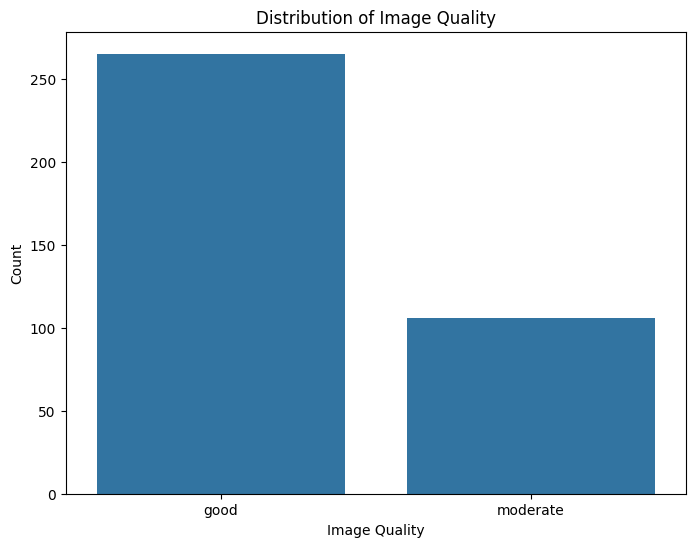

In [5]:
# Plot image quality distribution
plot_univariate_categorical('What is the quality of the picture?', 'Distribution of Image Quality', 'Image Quality')

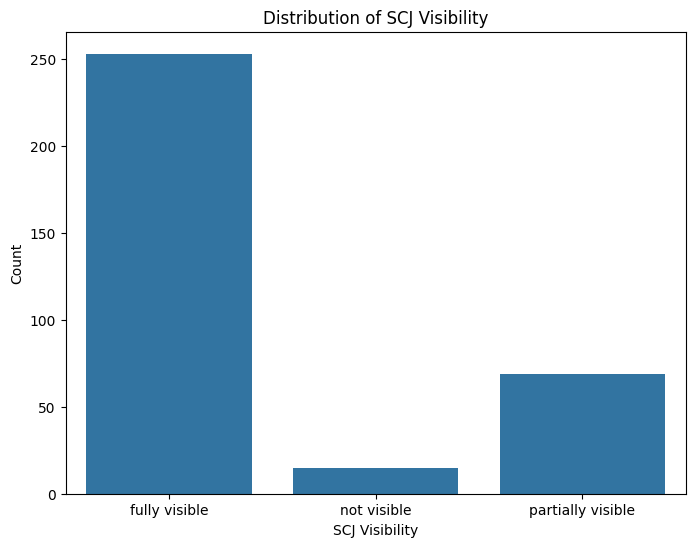

In [6]:
# Plot SCJ visibility distribution
plot_univariate_categorical('Is SCJ fully visible', 'Distribution of SCJ Visibility', 'SCJ Visibility')

In [7]:
# Step 3: Bivariate Analysis - Correlation and Comparisons
def plot_bivariate_comparison(x_column, y_column, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

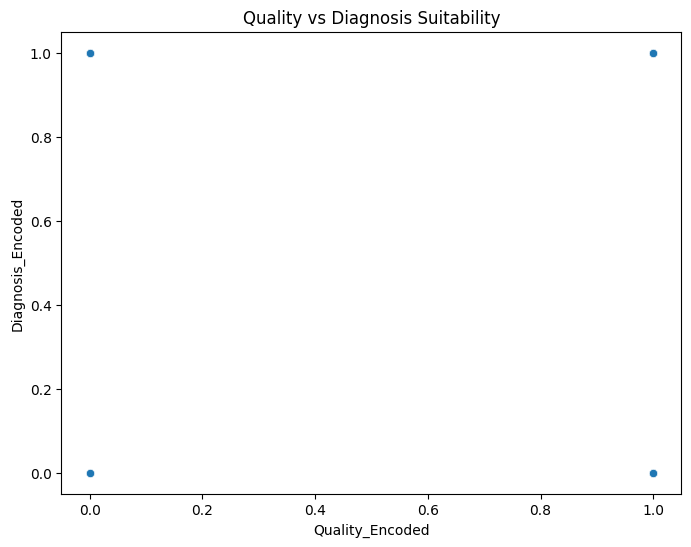

In [8]:
# Example: Plot Quality vs Diagnosis Suitability
plot_bivariate_comparison('Quality_Encoded', 'Diagnosis_Encoded', 'Quality vs Diagnosis Suitability')

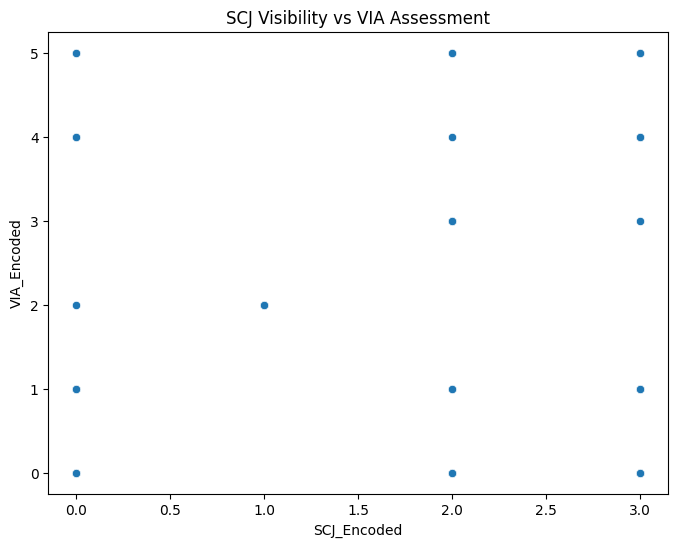

In [9]:
# Example: Plot SCJ Visibility vs VIA Assessment
plot_bivariate_comparison('SCJ_Encoded', 'VIA_Encoded', 'SCJ Visibility vs VIA Assessment')

In [11]:
# Step 4: Pie Charts for Distributions
def plot_pie_chart(column_name, title):
    plt.figure(figsize=(8, 6))
    pie_data = data[column_name].value_counts()
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

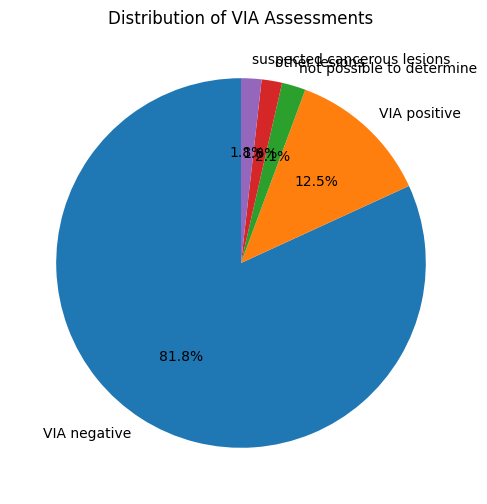

In [12]:
# Plot VIA Assessment Pie Chart
plot_pie_chart('What is the VIA assessment?', 'Distribution of VIA Assessments')

# Step 5: Additional Analysis

In [13]:
# Correlation Matrix
def plot_correlation_matrix():
    plt.figure(figsize=(10, 8))
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Encoded Variables')
    plt.show()

In [15]:
# Plot the correlation matrix
# plot_correlation_matrix()

In [16]:
# Step 2: Univariate Analysis - Categorical Distributions
def plot_univariate_categorical(column_name, title, xlabel):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column_name, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()

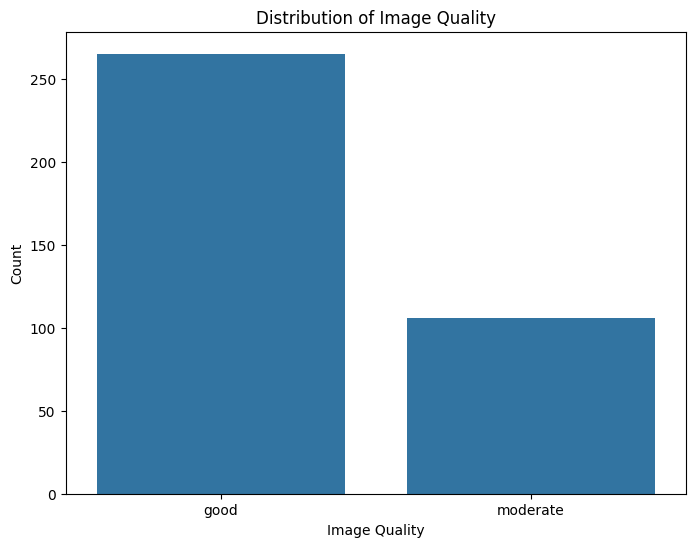

In [17]:
# Plot image quality distribution
plot_univariate_categorical('What is the quality of the picture?', 'Distribution of Image Quality', 'Image Quality')

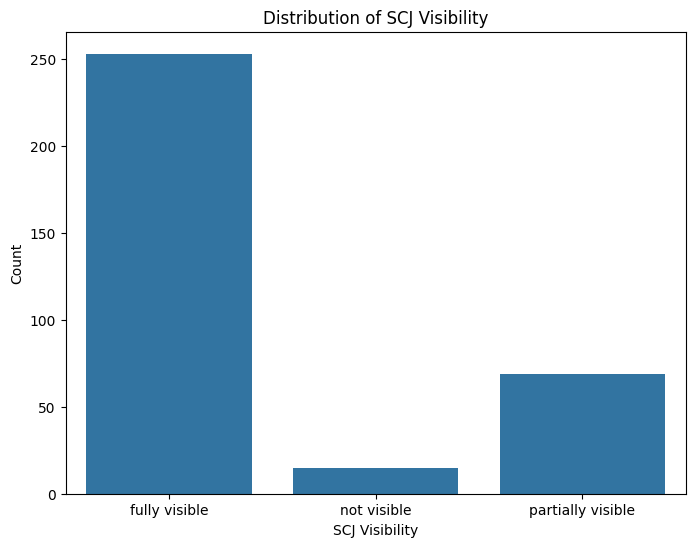

In [18]:
# Plot SCJ visibility distribution
plot_univariate_categorical('Is SCJ fully visible', 'Distribution of SCJ Visibility', 'SCJ Visibility')

In [19]:
# Step 3: Bivariate Analysis - Correlation and Comparisons
def plot_bivariate_comparison(x_column, y_column, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

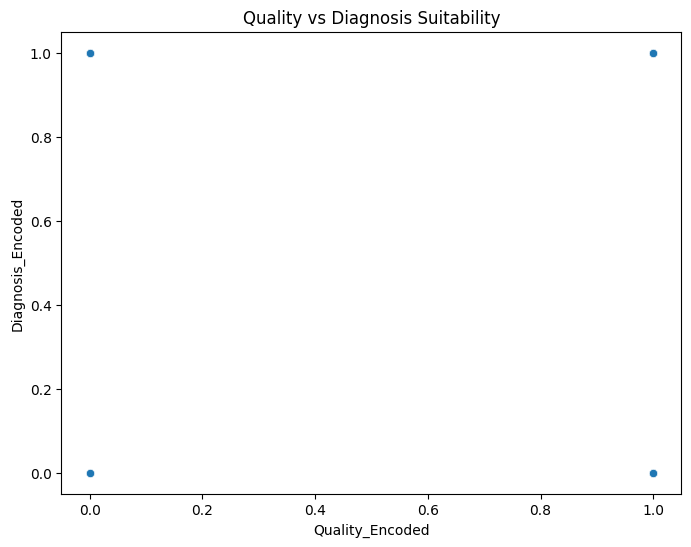

In [20]:
# Example: Plot Quality vs Diagnosis Suitability
plot_bivariate_comparison('Quality_Encoded', 'Diagnosis_Encoded', 'Quality vs Diagnosis Suitability')

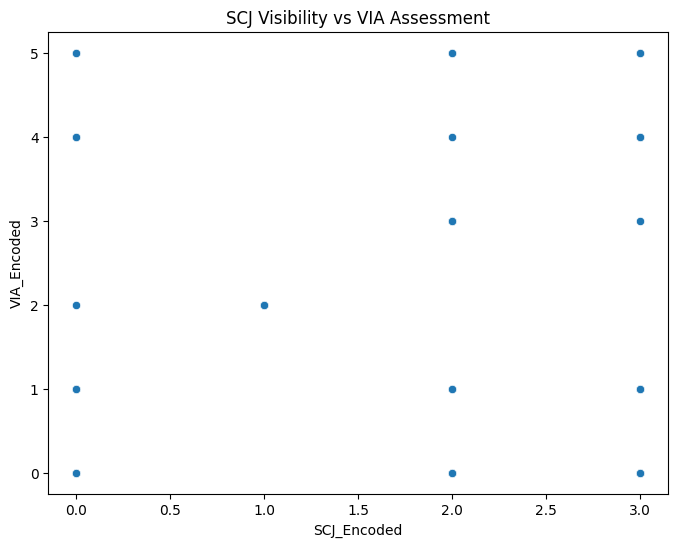

In [21]:
# Example: Plot SCJ Visibility vs VIA Assessment
plot_bivariate_comparison('SCJ_Encoded', 'VIA_Encoded', 'SCJ Visibility vs VIA Assessment')

In [22]:
# Step 4: Pie Charts for Distributions
def plot_pie_chart(column_name, title):
    plt.figure(figsize=(8, 6))
    pie_data = data[column_name].value_counts()
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

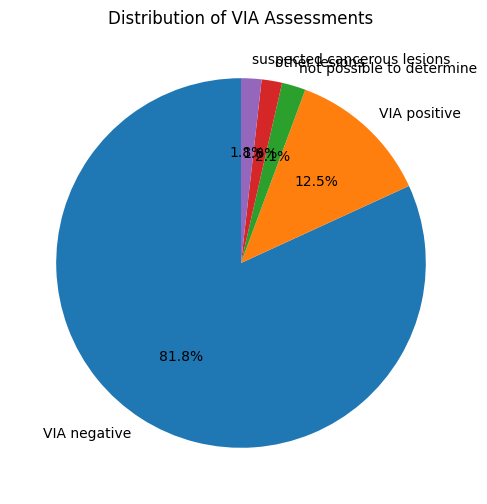

In [23]:
# Plot VIA Assessment Pie Chart
plot_pie_chart('What is the VIA assessment?', 'Distribution of VIA Assessments')

In [24]:
# Step 5: Additional Graphs
# 5.1 Box Plot for Lesion Size Distribution
def plot_boxplot(column_name, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column_name, data=data)
    plt.title(title)
    plt.show()

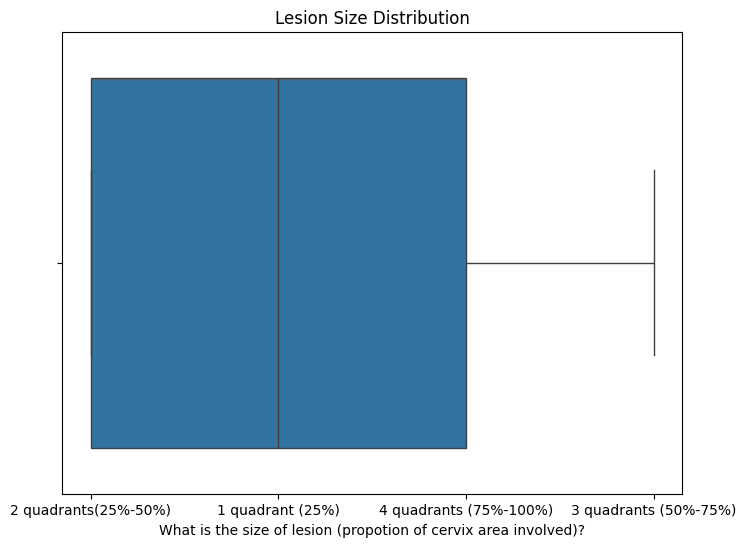

In [25]:
# Example: Plot Boxplot of Lesion Size
plot_boxplot('What is the size of lesion (propotion of cervix area involved)?', 'Lesion Size Distribution')

In [26]:
# 5.2 Histogram for Distribution
def plot_histogram(column_name, title):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column_name].dropna(), kde=True)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

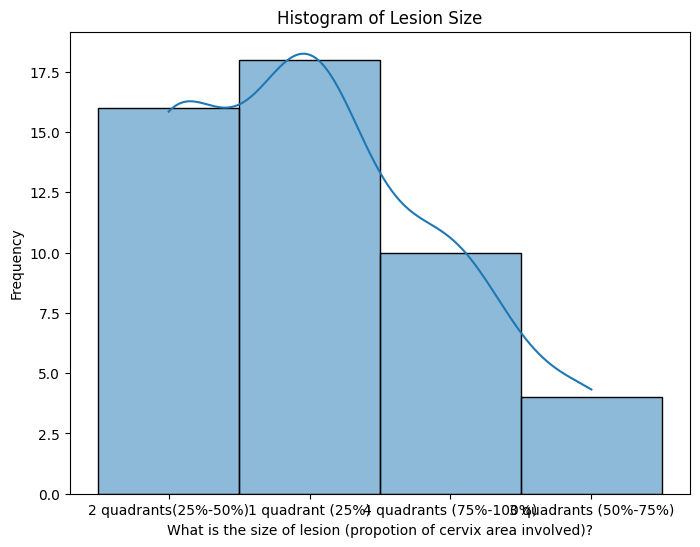

In [27]:
# Example: Histogram of Lesion Size
plot_histogram('What is the size of lesion (propotion of cervix area involved)?', 'Histogram of Lesion Size')

In [28]:
# 5.3 Stacked Bar Chart for Categorical Comparison
def plot_stacked_bar_chart(column1, column2, title):
    cross_tab = pd.crosstab(data[column1], data[column2])
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

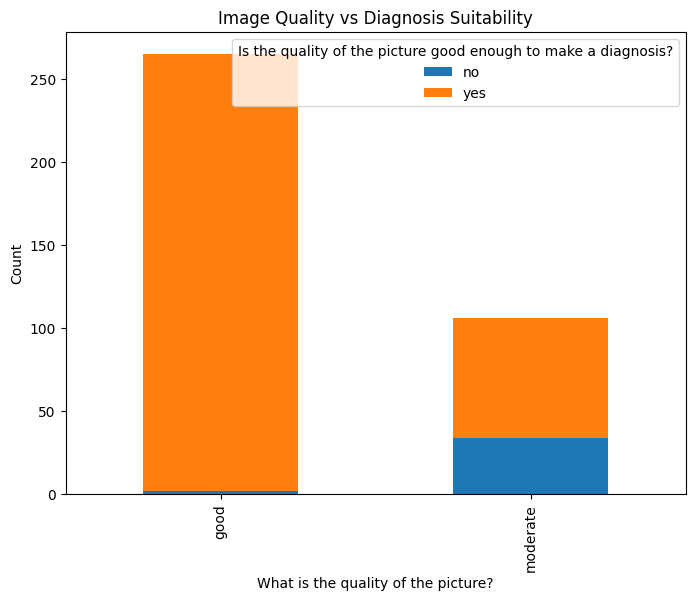

In [29]:
# Example: Stacked Bar Chart for Image Quality vs Diagnosis
plot_stacked_bar_chart('What is the quality of the picture?', 'Is the quality of the picture good enough to make a diagnosis?', 'Image Quality vs Diagnosis Suitability')

In [30]:
# 5.4 Violin Plot for Distribution Comparison
def plot_violin_plot(x_column, y_column, title):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.show()

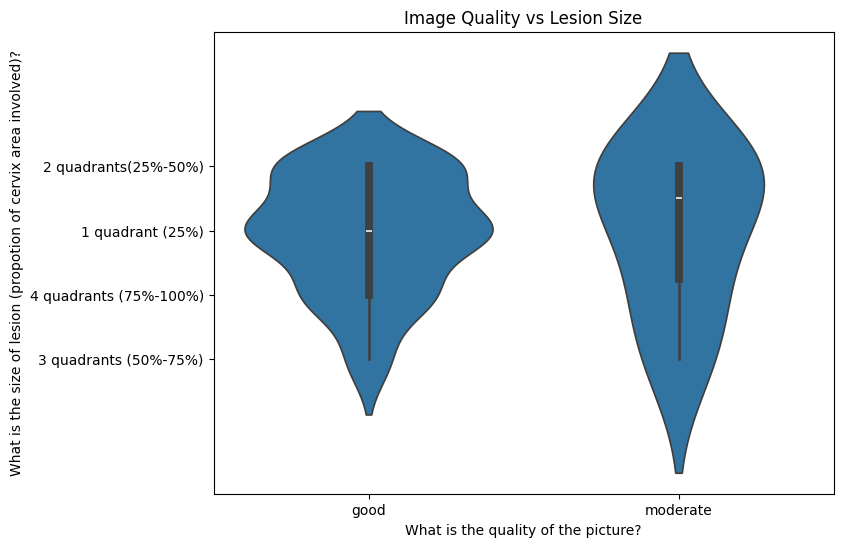

In [31]:
# Example: Violin Plot for Image Quality vs Lesion Size
plot_violin_plot('What is the quality of the picture?', 'What is the size of lesion (propotion of cervix area involved)?', 'Image Quality vs Lesion Size')


In [36]:
# Step 2: Univariate Analysis - Categorical Distributions
def plot_univariate_categorical(column_name, title, xlabel):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column_name, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()

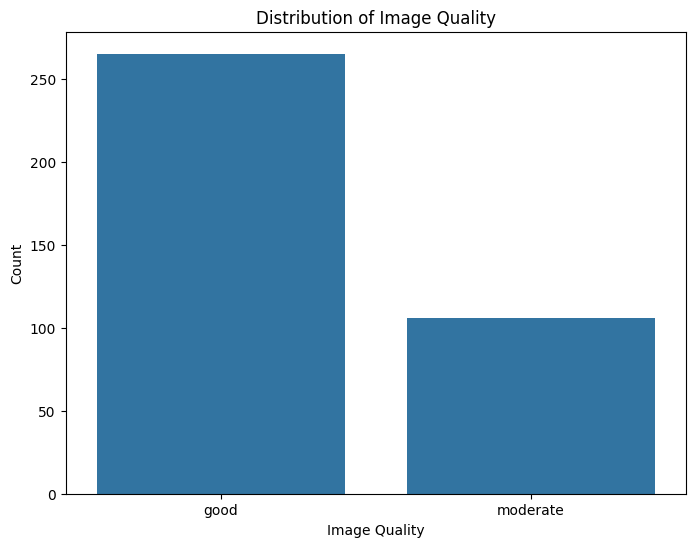

In [37]:
# Plot image quality distribution
plot_univariate_categorical('What is the quality of the picture?', 'Distribution of Image Quality', 'Image Quality')

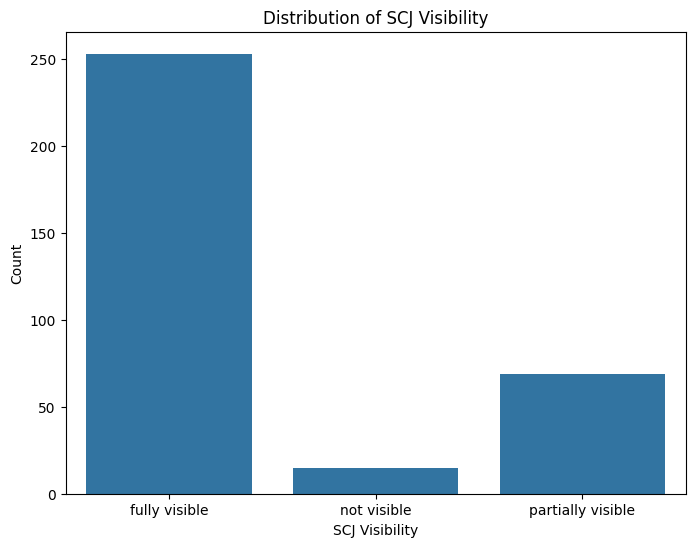

In [38]:
# Plot SCJ visibility distribution
plot_univariate_categorical('Is SCJ fully visible', 'Distribution of SCJ Visibility', 'SCJ Visibility')

In [39]:
# Step 3: Bivariate Analysis - Correlation and Comparisons
def plot_bivariate_comparison(x_column, y_column, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

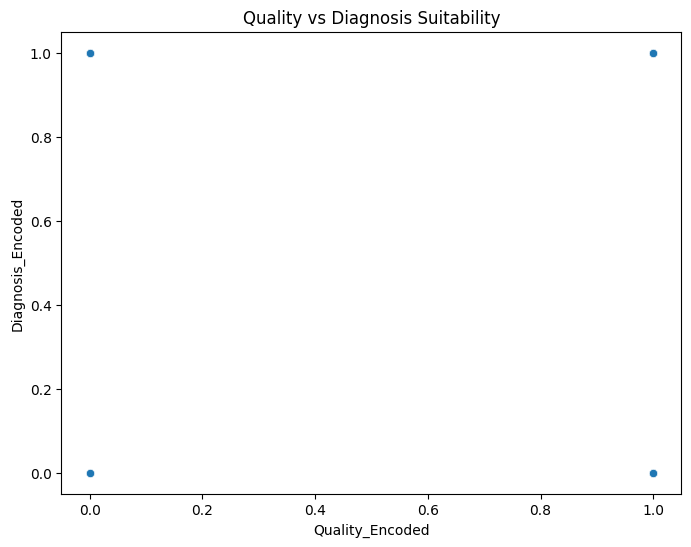

In [40]:
# Example: Plot Quality vs Diagnosis Suitability
plot_bivariate_comparison('Quality_Encoded', 'Diagnosis_Encoded', 'Quality vs Diagnosis Suitability')

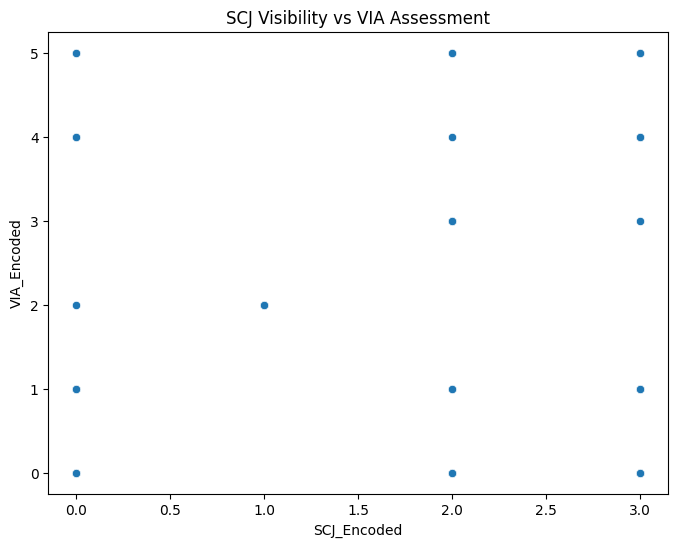

In [41]:
# Example: Plot SCJ Visibility vs VIA Assessment
plot_bivariate_comparison('SCJ_Encoded', 'VIA_Encoded', 'SCJ Visibility vs VIA Assessment')

In [42]:
# Step 4: Pie Charts for Distributions
def plot_pie_chart(column_name, title):
    plt.figure(figsize=(8, 6))
    pie_data = data[column_name].value_counts()
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

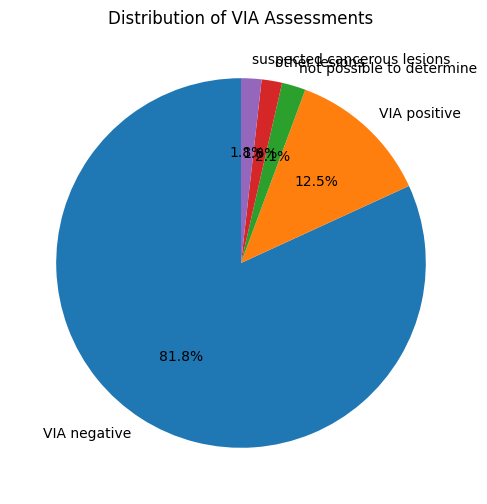

In [43]:
# Plot VIA Assessment Pie Chart
plot_pie_chart('What is the VIA assessment?', 'Distribution of VIA Assessments')

In [44]:
# Step 5: Additional Graphs
# 5.1 Box Plot for Lesion Size Distribution
def plot_boxplot(column_name, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column_name, data=data)
    plt.title(title)
    plt.show()

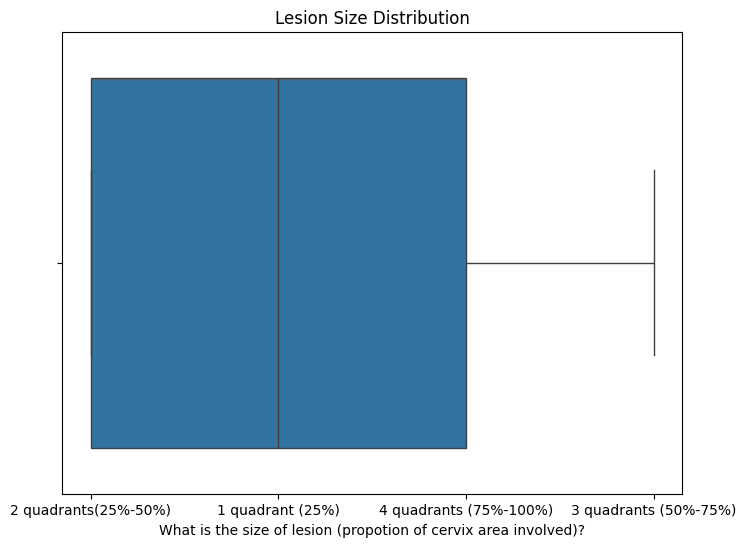

In [45]:
# Example: Plot Boxplot of Lesion Size
plot_boxplot('What is the size of lesion (propotion of cervix area involved)?', 'Lesion Size Distribution')

In [46]:
# 5.2 Histogram for Distribution
def plot_histogram(column_name, title):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column_name].dropna(), kde=True)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

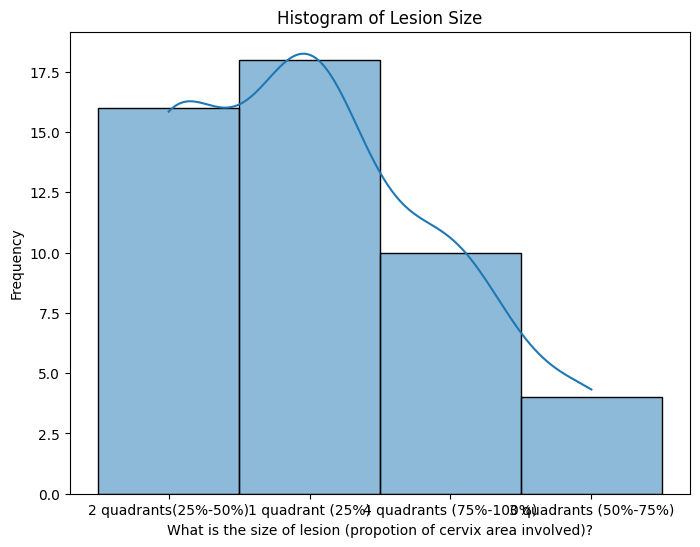

In [47]:
# Example: Histogram of Lesion Size
plot_histogram('What is the size of lesion (propotion of cervix area involved)?', 'Histogram of Lesion Size')

In [48]:
# 5.3 Stacked Bar Chart for Categorical Comparison
def plot_stacked_bar_chart(column1, column2, title):
    cross_tab = pd.crosstab(data[column1], data[column2])
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

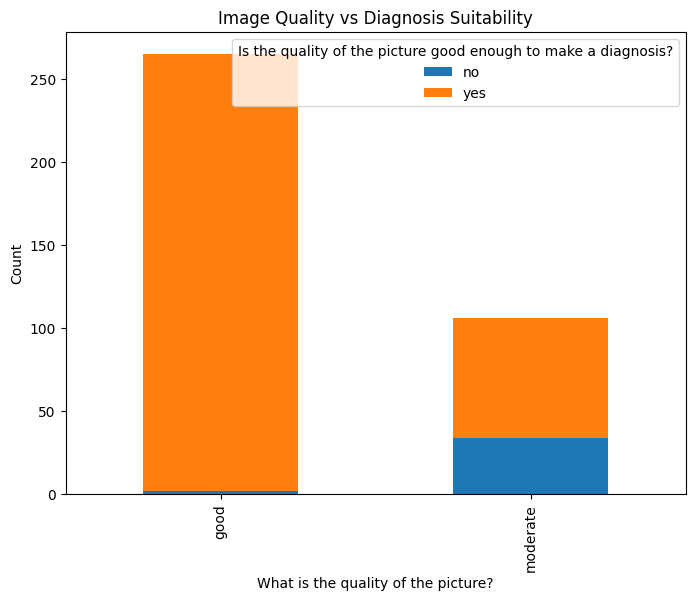

In [49]:
# Example: Stacked Bar Chart for Image Quality vs Diagnosis
plot_stacked_bar_chart('What is the quality of the picture?', 'Is the quality of the picture good enough to make a diagnosis?', 'Image Quality vs Diagnosis Suitability')

In [50]:
# 5.4 Violin Plot for Distribution Comparison
def plot_violin_plot(x_column, y_column, title):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=x_column, y=y_column, data=data)
    plt.title(title)
    plt.show()

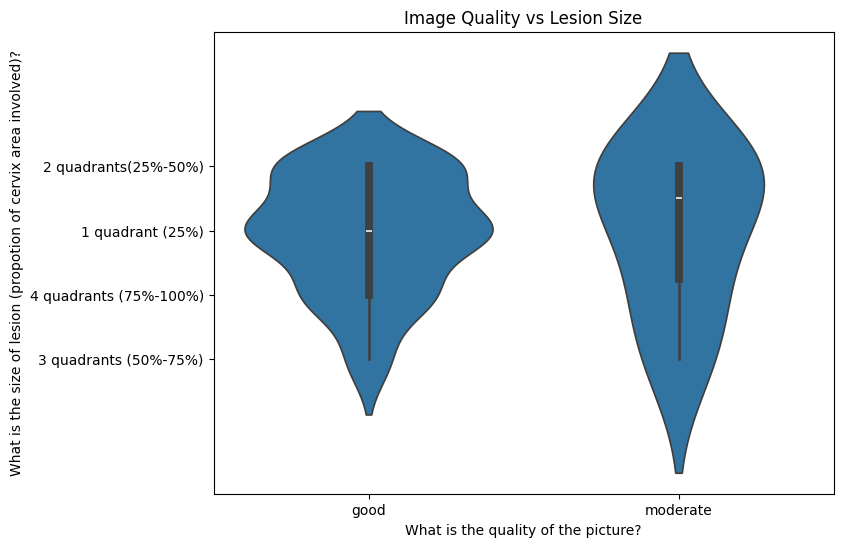

In [51]:
# Example: Violin Plot for Image Quality vs Lesion Size
plot_violin_plot('What is the quality of the picture?', 'What is the size of lesion (propotion of cervix area involved)?', 'Image Quality vs Lesion Size')

<Figure size 1000x600 with 0 Axes>

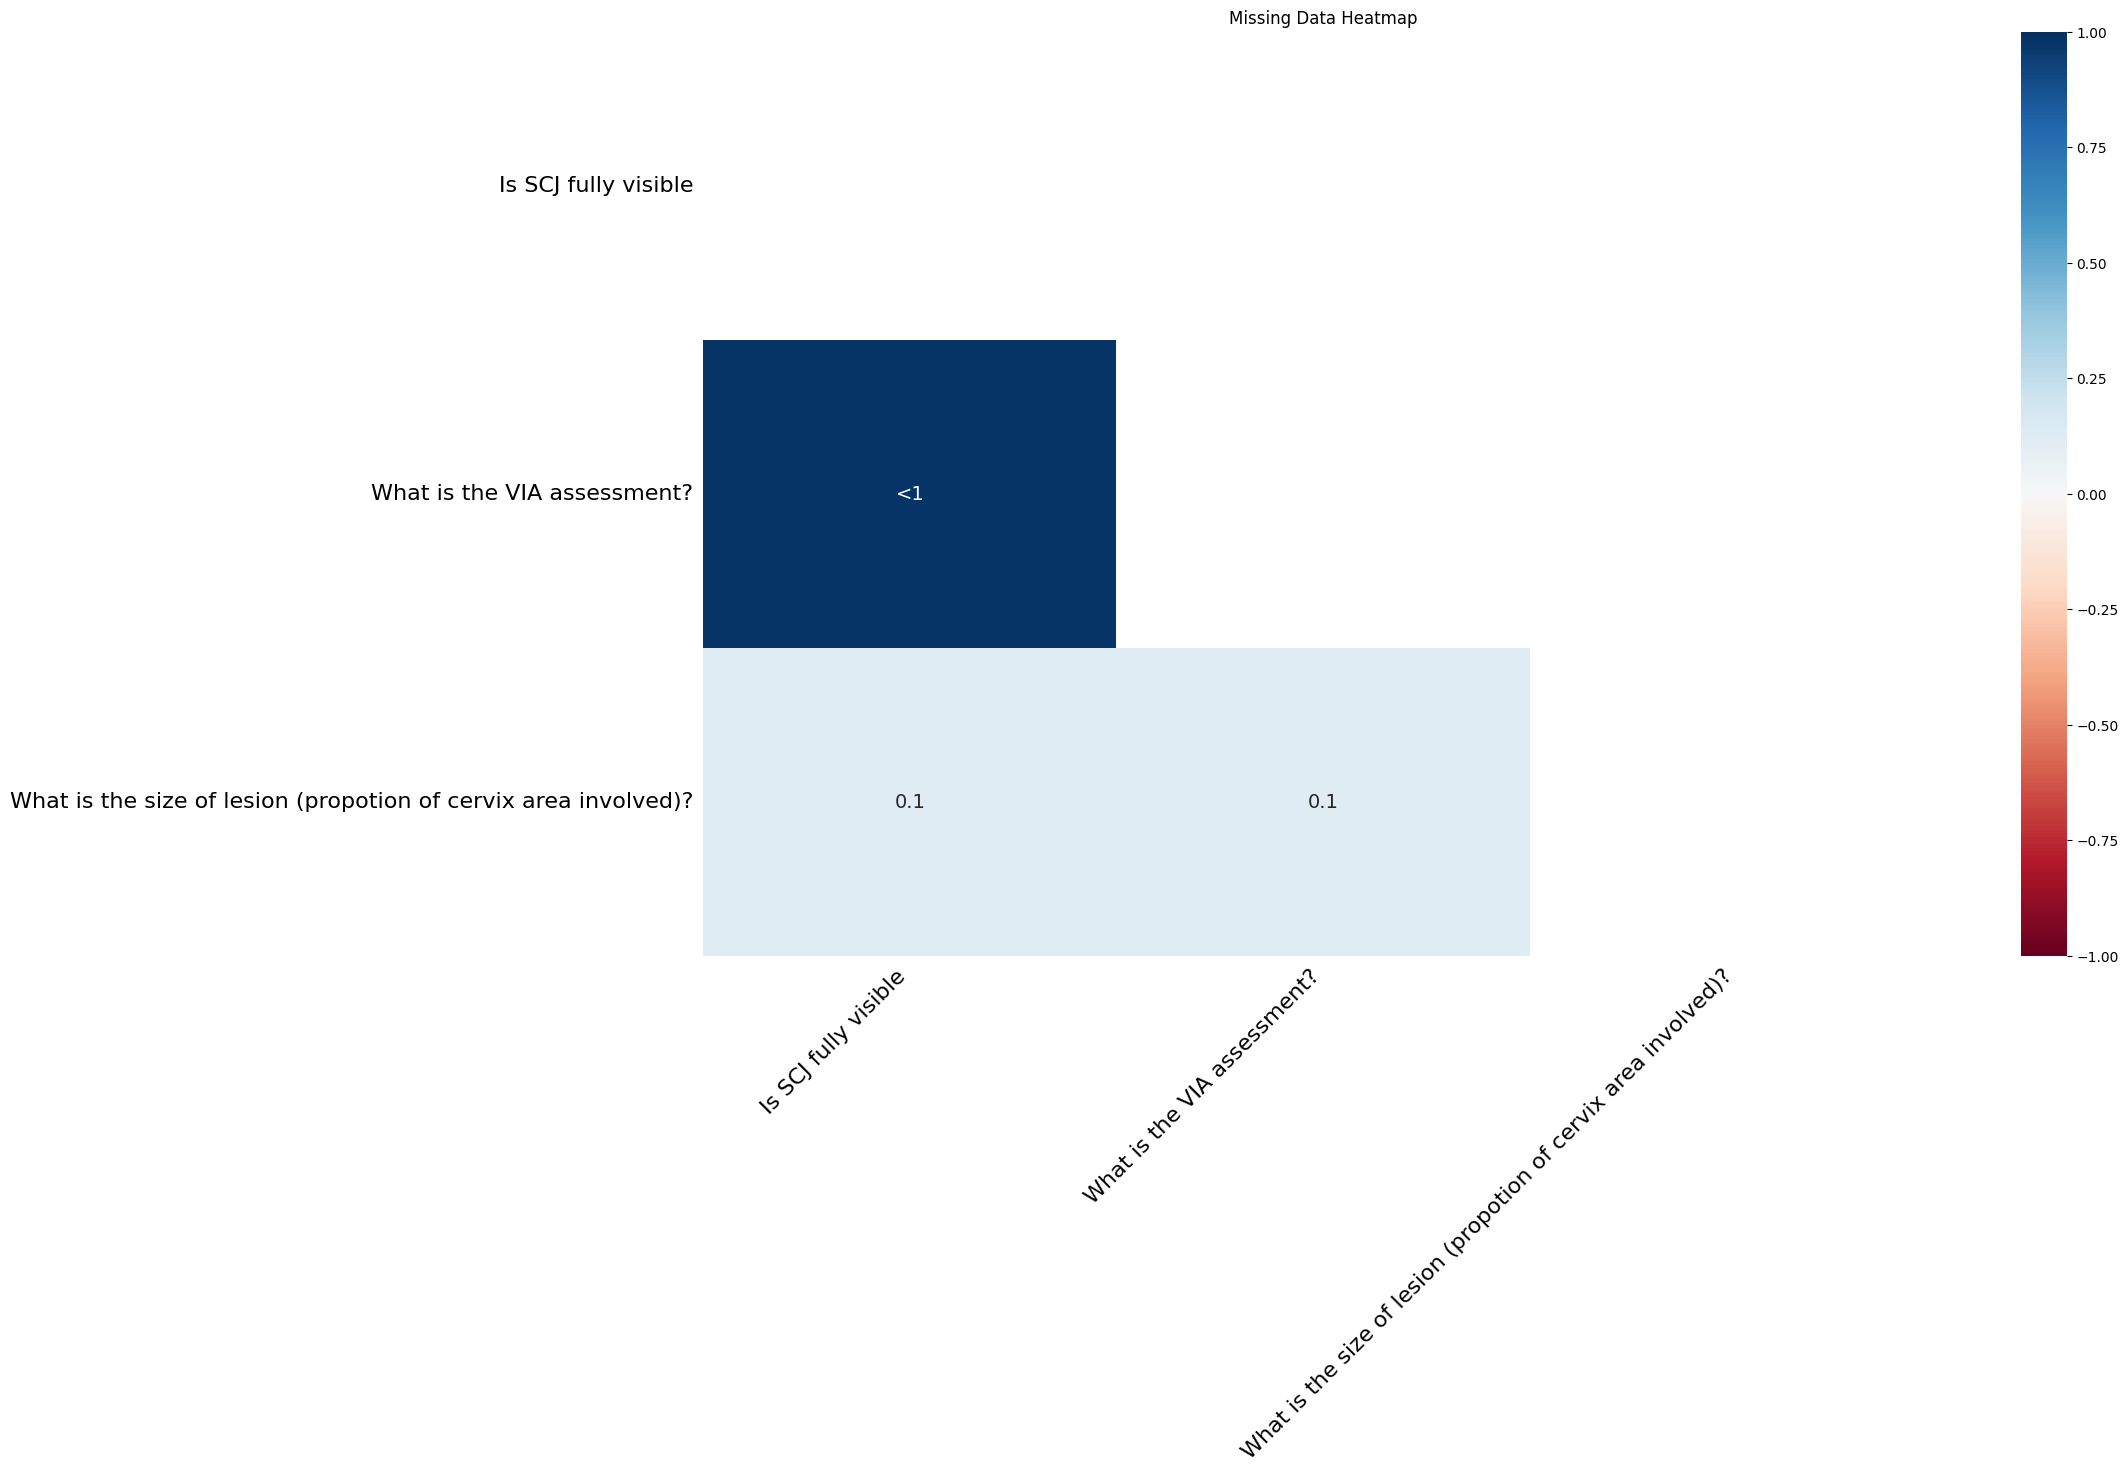

In [52]:
# 5.5 Heatmap for Missing Data
def plot_missing_data_heatmap():
    plt.figure(figsize=(10, 6))
    msno.heatmap(data)
    plt.title('Missing Data Heatmap')
    plt.show()

# Plot the heatmap for missing data
plot_missing_data_heatmap()

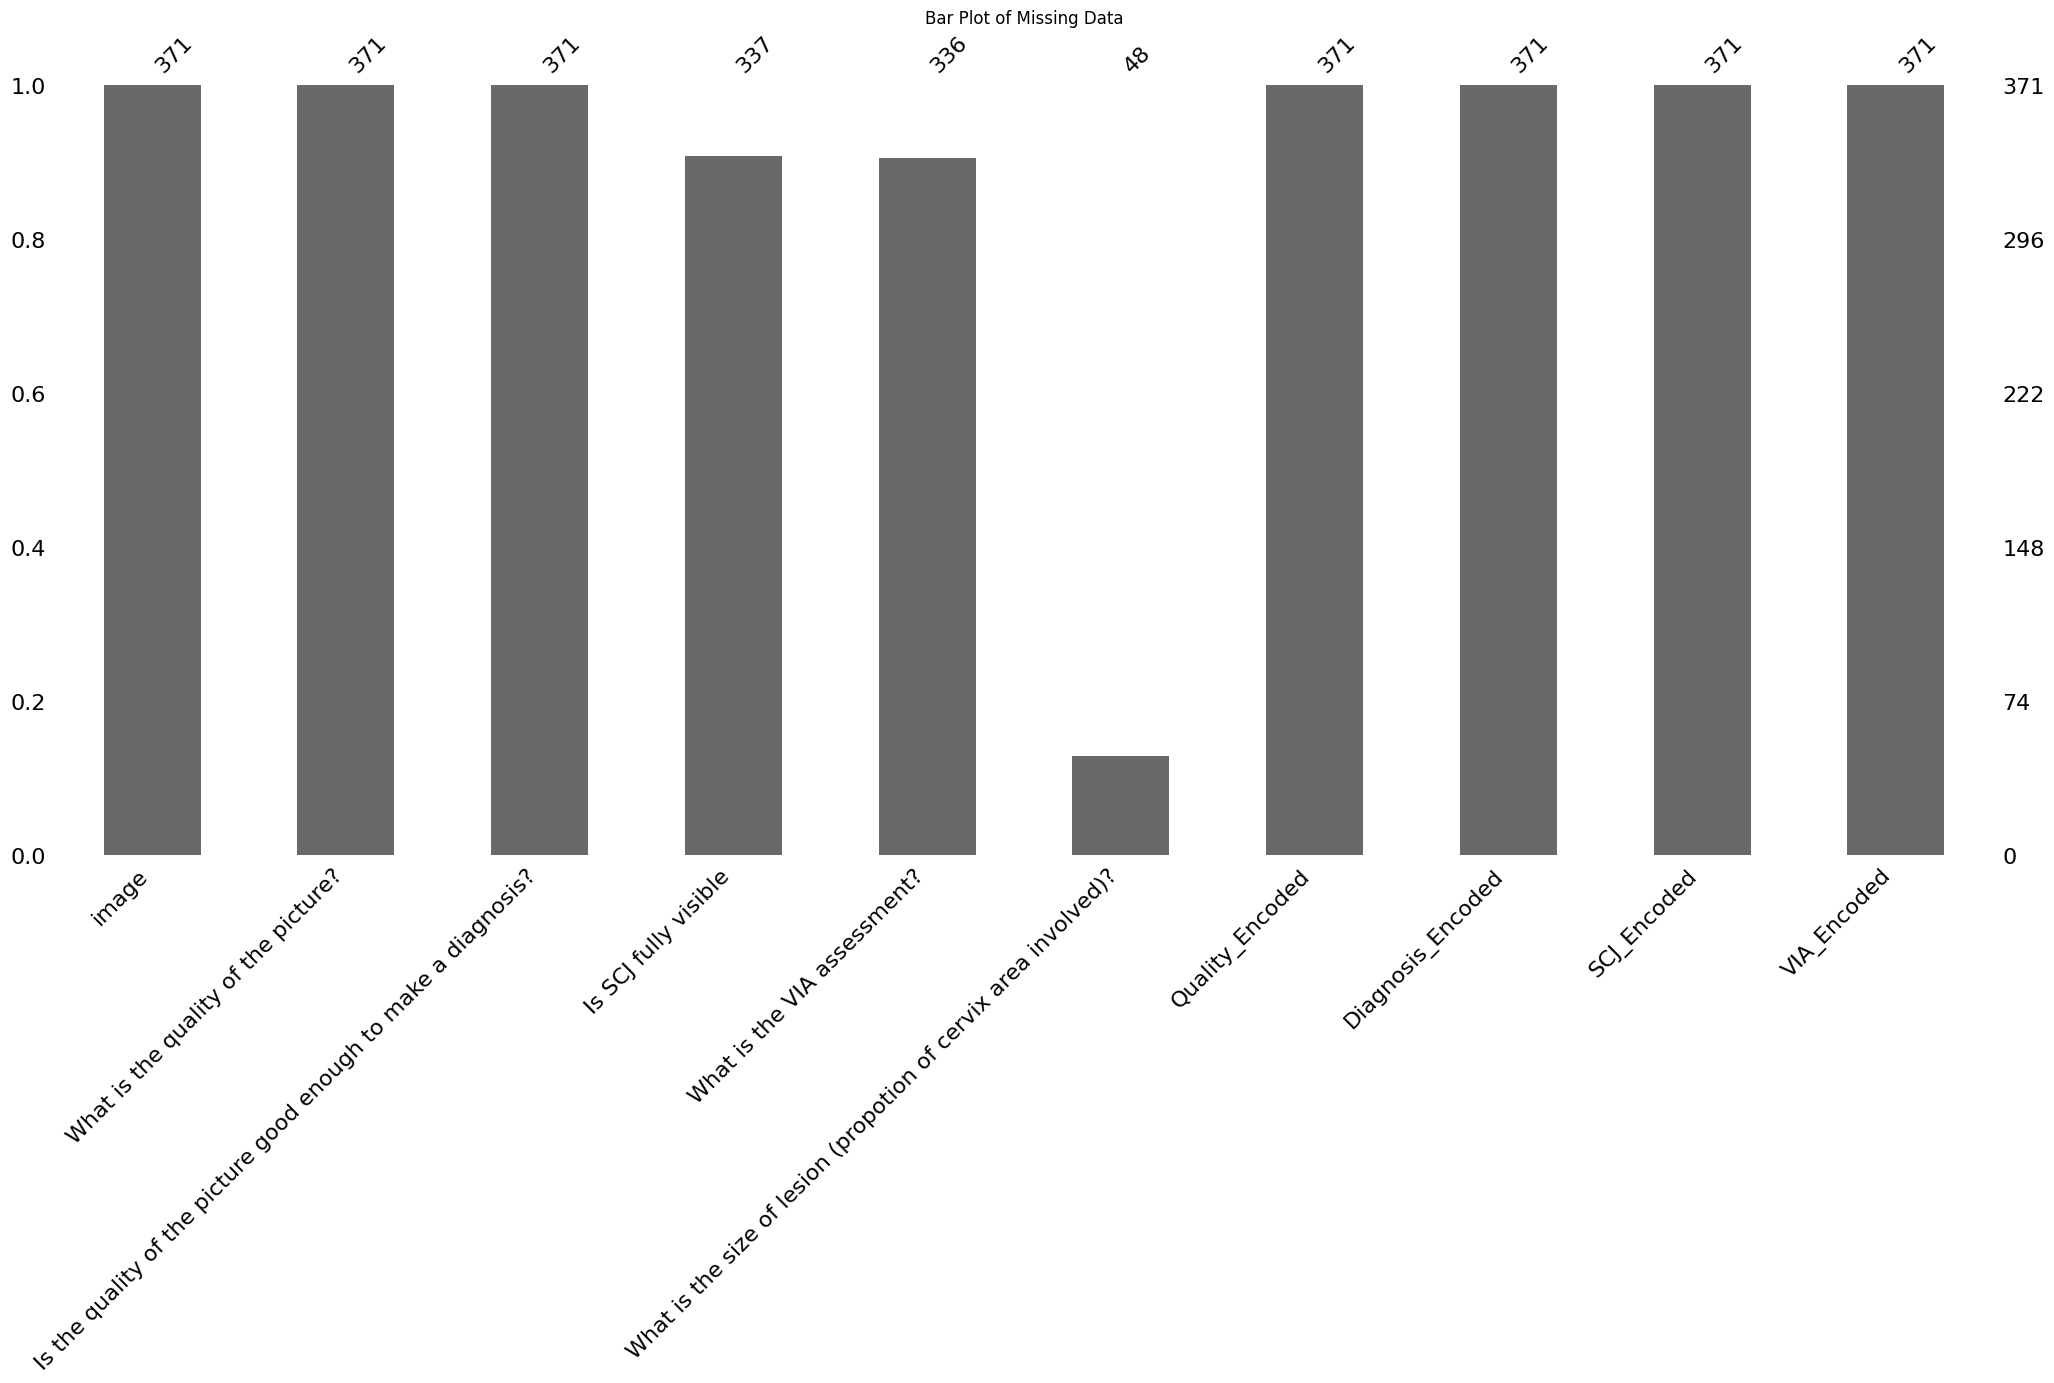

In [54]:
# 5.7 Bar Plot of Missing Data
def plot_missing_data_bar():
    plt.figure(figsize=(10, 6))
    msno.bar(data)
    plt.title('Bar Plot of Missing Data')
    plt.show()

# Plot missing data in bar format
plot_missing_data_bar()

In [55]:
# Step 2: Define a function to plot bivariate graphs with regression lines
def plot_bivariate_regression(x_column, y_column, title):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x_column, y=y_column, data=data, logistic=True, scatter_kws={'s': 50}, line_kws={"color": "red"})
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Step 3: Plot bivariate graphs for the specified pairs

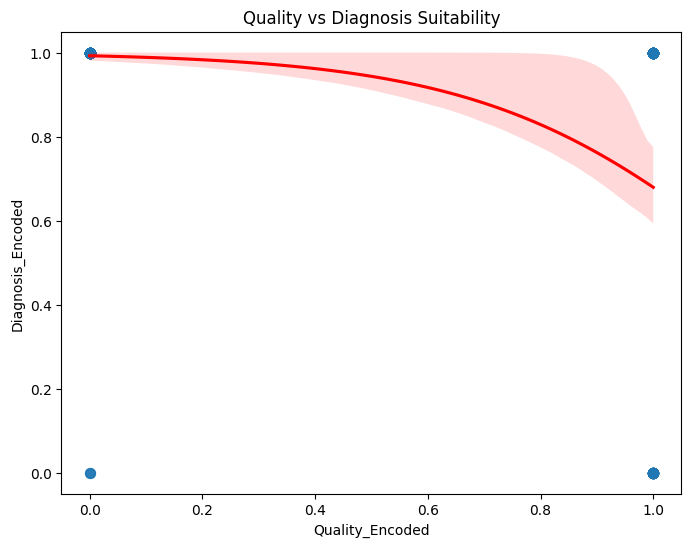

In [56]:
# 1. Quality_Encoded vs Diagnosis_Encoded
plot_bivariate_regression('Quality_Encoded', 'Diagnosis_Encoded', 'Quality vs Diagnosis Suitability')

In [ ]:
# 2. Diagnosis_Encoded vs VIA_Encoded
plot_bivariate_regression('Diagnosis_Encoded', 'VIA_Encoded', 'Diagnosis Suitability vs VIA Assessment')

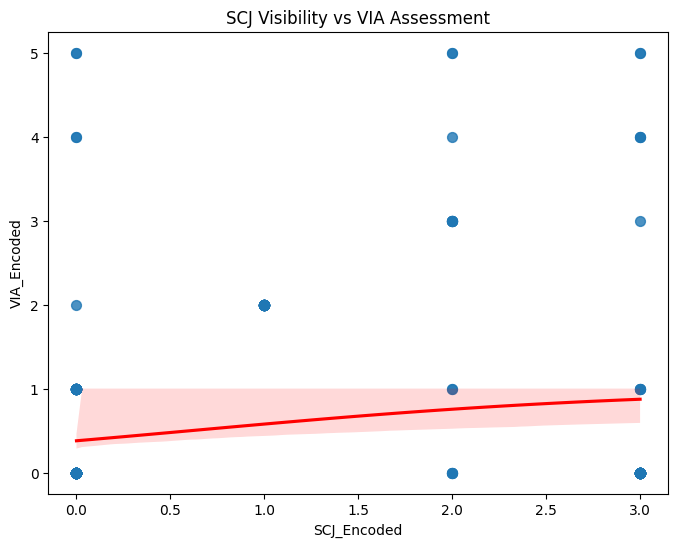

In [58]:
# 3. SCJ_Encoded vs VIA_Encoded
plot_bivariate_regression('SCJ_Encoded', 'VIA_Encoded', 'SCJ Visibility vs VIA Assessment')

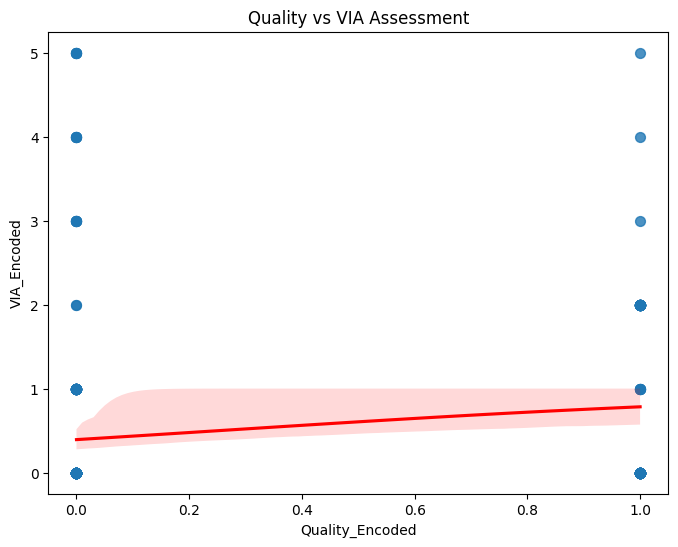

In [59]:
# 4. Quality_Encoded vs VIA_Encoded
plot_bivariate_regression('Quality_Encoded', 'VIA_Encoded', 'Quality vs VIA Assessment')

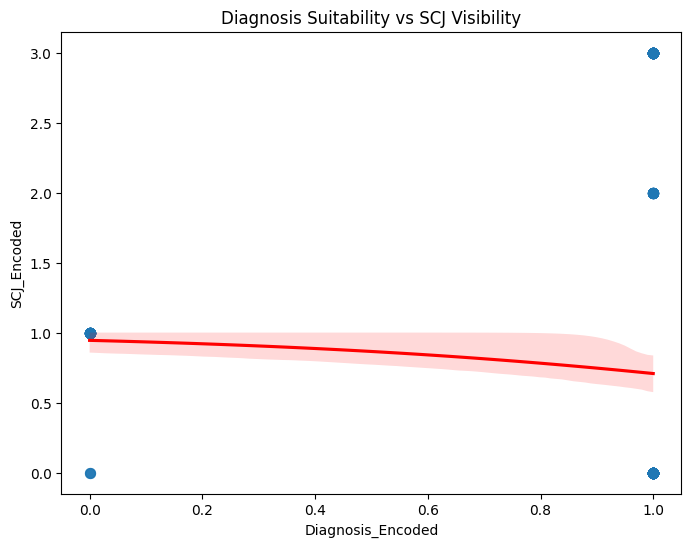

In [60]:
# 5. Diagnosis_Encoded vs SCJ_Encoded
plot_bivariate_regression('Diagnosis_Encoded', 'SCJ_Encoded', 'Diagnosis Suitability vs SCJ Visibility')

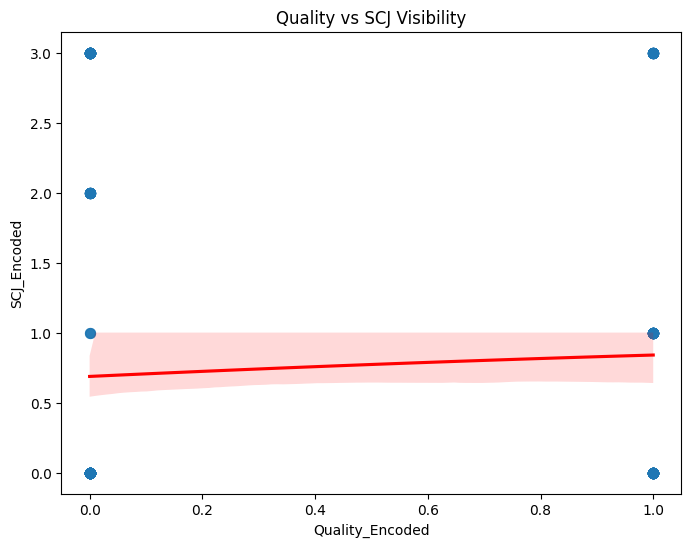

In [61]:
# 6. Quality_Encoded vs SCJ_Encoded
plot_bivariate_regression('Quality_Encoded', 'SCJ_Encoded', 'Quality vs SCJ Visibility')

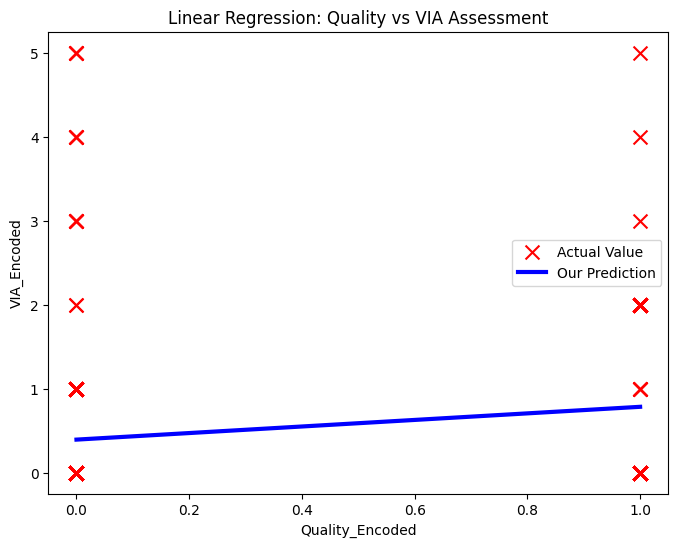

In [4]:
# Extract the feature and target
X = data['Quality_Encoded'].values.reshape(-1, 1)  # Feature: Picture Quality
y = data['VIA_Encoded'].values  # Target: VIA Assessment

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Plotting the actual values and predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', label='Actual Value', marker='x', s=100)
plt.plot(X, y_pred, label='Our Prediction', color='blue', linewidth=3)

plt.title("Linear Regression: Quality vs VIA Assessment")
plt.xlabel("Quality_Encoded")
plt.ylabel("VIA_Encoded")
plt.legend()
plt.show()


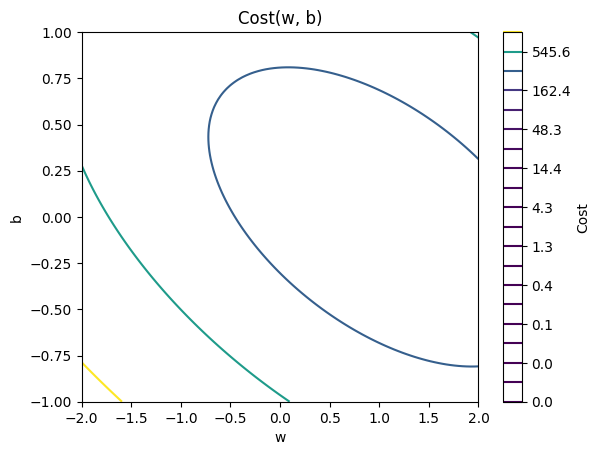

In [5]:
# Example cost function: mean squared error
def compute_cost(X, y, w, b):
    m = X.shape[0]
    return (1 / (2 * m)) * np.sum((w * X + b - y) ** 2)

# Generate a grid of values for w and b
w_vals = np.linspace(-2, 2, 100)
b_vals = np.linspace(-1, 1, 100)
J_vals = np.zeros((len(w_vals), len(b_vals)))

# Fill J_vals with the cost for each pair of (w, b)
for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        J_vals[i, j] = compute_cost(X, y, w_vals[i], b_vals[j])

# Plot the contour plot
plt.contour(w_vals, b_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.xlabel('w')
plt.ylabel('b')
plt.title('Cost(w, b)')
plt.colorbar(label='Cost')
plt.show()

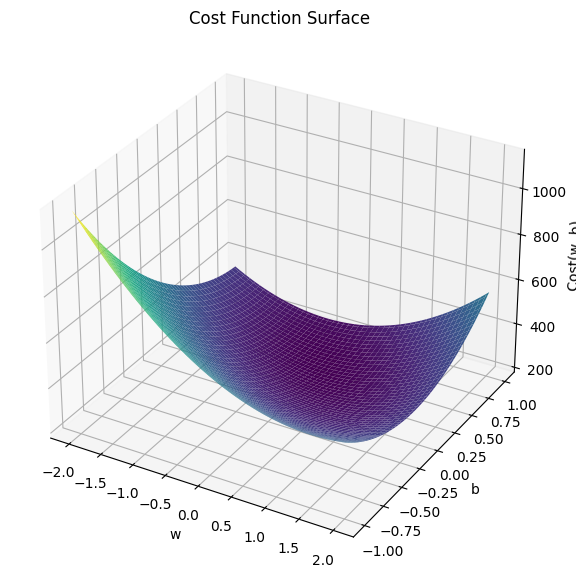

In [6]:




# Create meshgrid for w and b
W, B = np.meshgrid(w_vals, b_vals)
Z = np.array([compute_cost(X, y, w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
Z = Z.reshape(W.shape)

# Plot 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost(w, b)')
ax.set_title('Cost Function Surface')
plt.show()
